In [1]:
import os, shutil, ants

In [2]:
import antspynet

In [2]:
t1 = ants.image_read('assets/T1.nii.gz')
b0 = ants.image_read('assets/b0.nii.gz')

In [3]:
output_dir = 'registered'

if os.path.isdir(output_dir):
    shutil.rmtree(output_dir)

os.makedirs(output_dir)

In [4]:
transform_list = ants.registration(fixed=b0, moving=t1, type_of_transform='Affine')
transformed_t1 = ants.apply_transforms(fixed=b0, moving=t1, transformlist=transform_list['fwdtransforms'])

ants.image_write(transformed_t1, output_dir + '/T1.nii.gz')

In [5]:
r1 = ants.image_read('assets/MPM/R1.nii.gz')
r2s = ants.image_read('assets/MPM/R2s.nii.gz')
pd = ants.image_read('assets/MPM/PD.nii.gz')
mtsat = ants.image_read('assets/MPM/MTsat.nii.gz')

In [6]:
transform_list = ants.registration(fixed=b0, moving=r1, type_of_transform='Affine')

transformed_r1 = ants.apply_transforms(fixed=b0, moving=r1, transformlist=transform_list['fwdtransforms'])
transformed_r2s = ants.apply_transforms(fixed=b0, moving=r2s, transformlist=transform_list['fwdtransforms'])
transformed_pd = ants.apply_transforms(fixed=b0, moving=pd, transformlist=transform_list['fwdtransforms'])
transformed_mtsat = ants.apply_transforms(fixed=b0, moving=mtsat, transformlist=transform_list['fwdtransforms'])

ants.image_write(transformed_r1, output_dir + '/R1_to_dwi.nii.gz')
ants.image_write(transformed_r2s, output_dir + '/R2s_to_dwi.nii.gz')
ants.image_write(transformed_pd, output_dir + '/PD_to_dwi.nii.gz')
ants.image_write(transformed_mtsat, output_dir + '/MTsat_to_dwi.nii.gz')

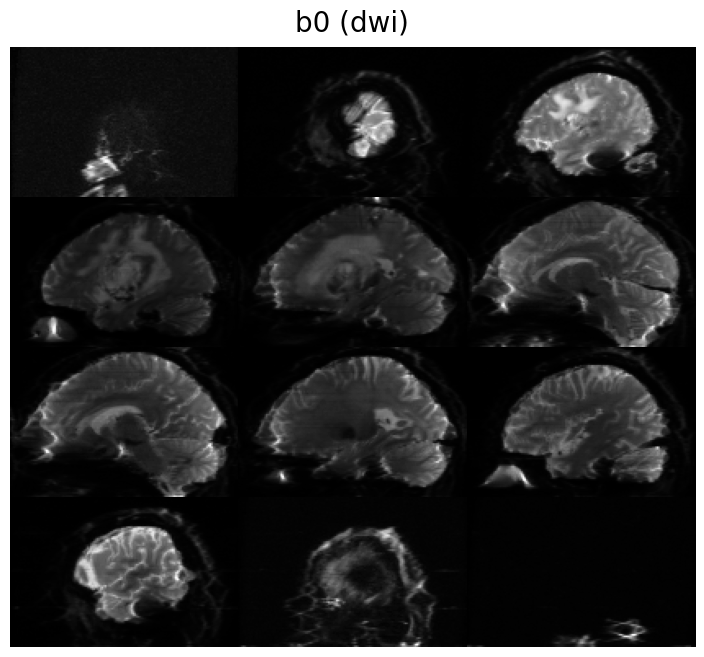

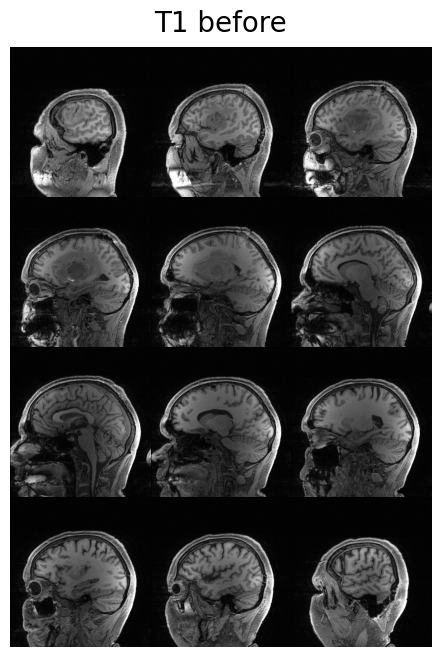

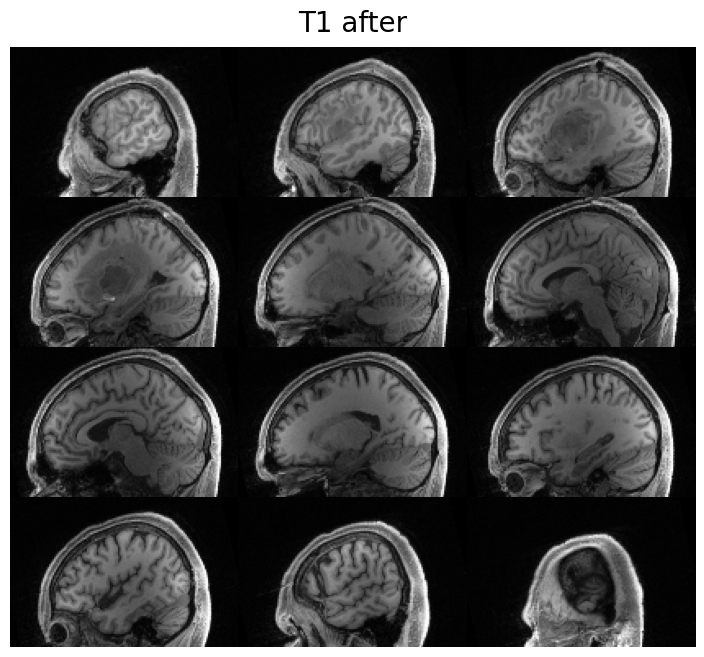

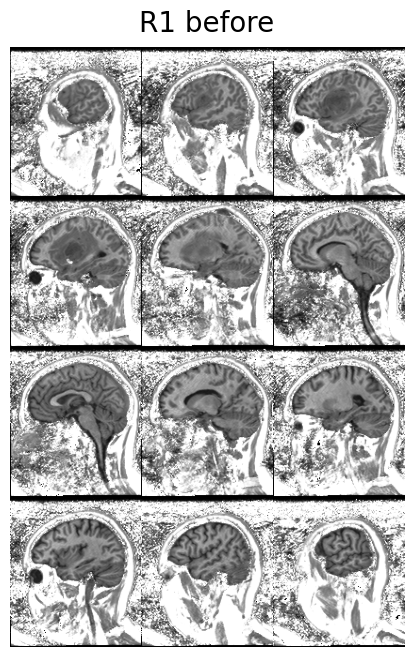

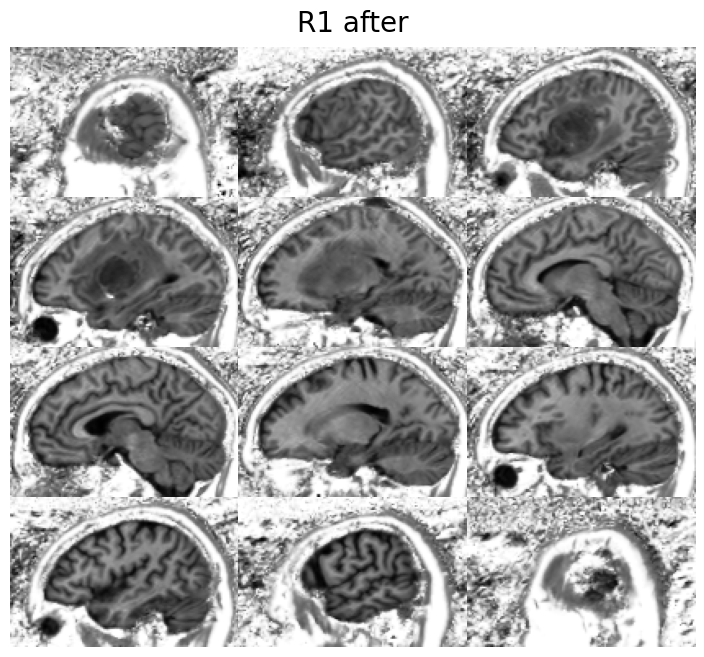

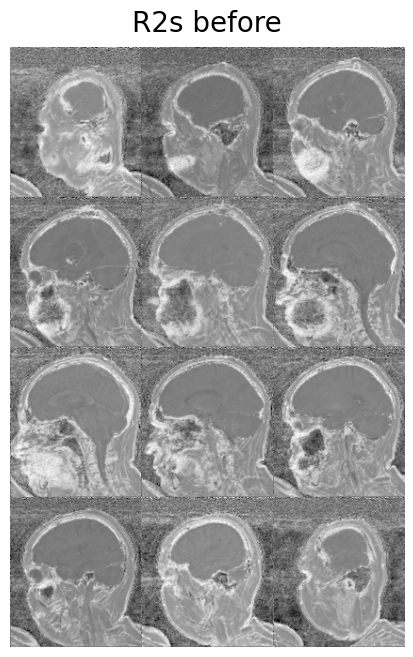

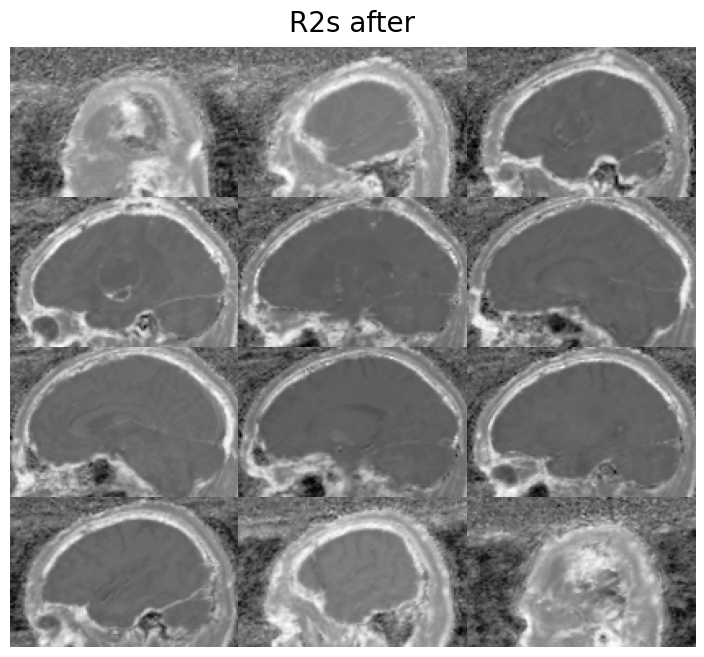

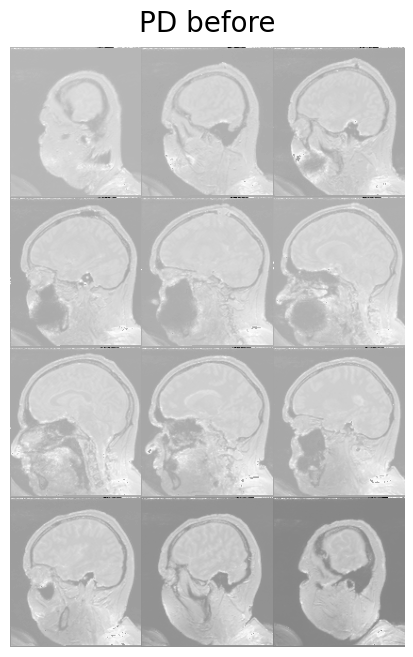

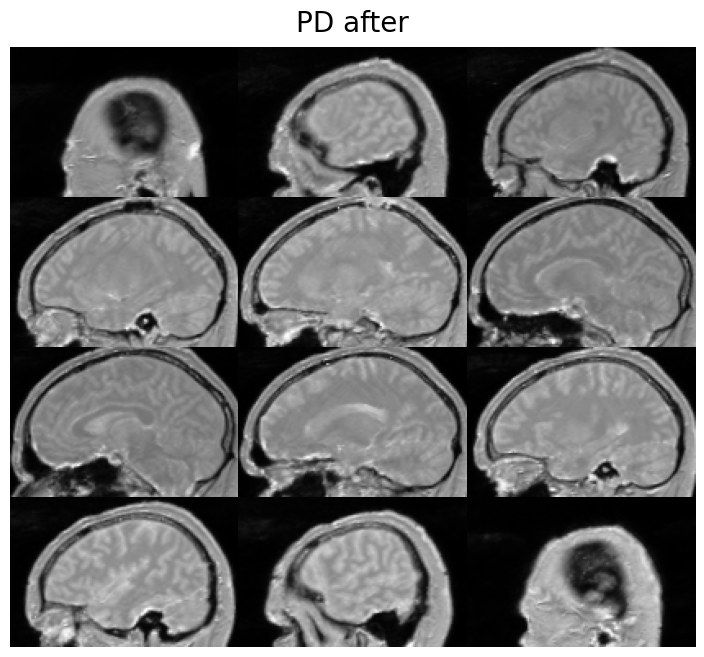

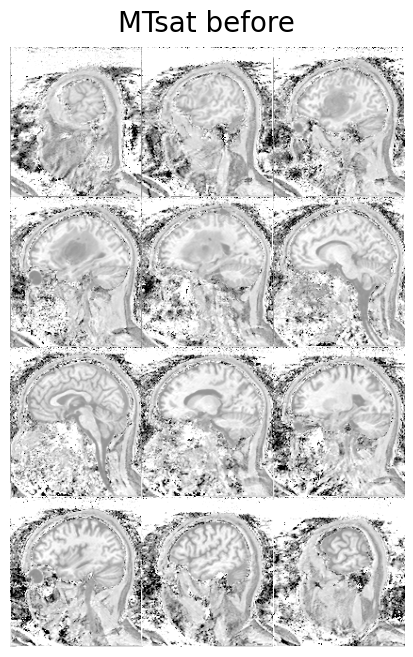

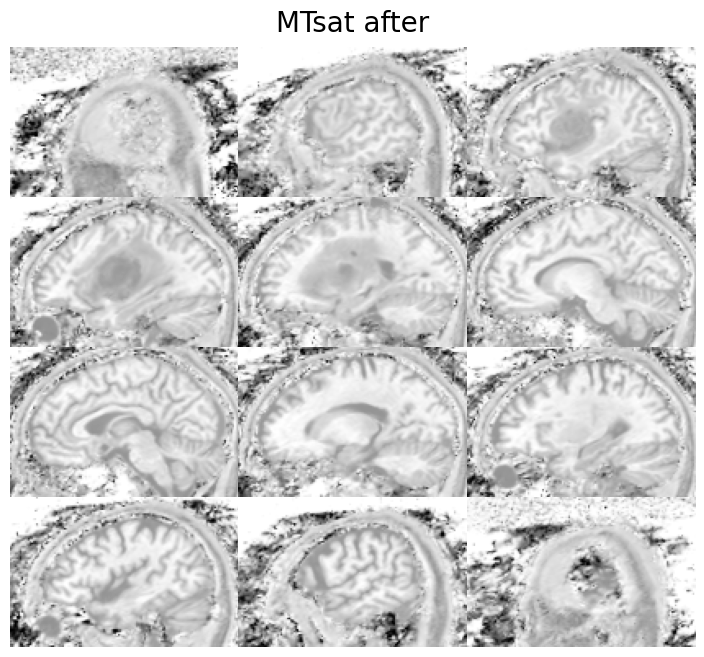

In [7]:
ants.plot(b0, title='b0 (dwi)')

ants.plot(t1, title='T1 before')
ants.plot(transformed_t1, title='T1 after')

ants.plot(r1, title='R1 before')
ants.plot(transformed_r1, title='R1 after')
ants.plot(r2s, title='R2s before')
ants.plot(transformed_r2s, title='R2s after')
ants.plot(pd, title='PD before')
ants.plot(transformed_pd, title='PD after')
ants.plot(mtsat, title='MTsat before')
ants.plot(transformed_mtsat, title='MTsat after')

In [ ]:
segmentation = antspynet.deep_atropos(t1)
ants.plot(segmentation['segmentation_image'])